In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten, Dropout
from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np



In [2]:

# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

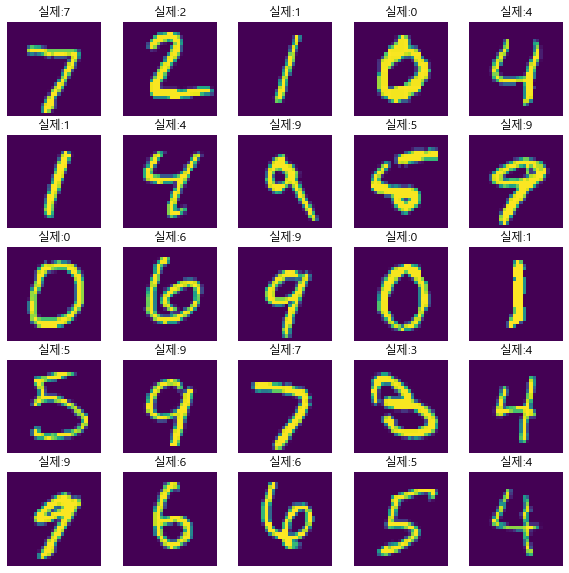

In [3]:
plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    sub_plt.set_title("실제:"+str(np.argmax(y_test[i])))

# 1. DNN 다중 퍼셉트론

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3945 - accuracy: 0.8790 - val_loss: 0.1154 - val_accuracy: 0.9674
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0989 - accuracy: 0.9691 - val_loss: 0.1078 - val_accuracy: 0.9685
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0915 - val_accuracy: 0.9739
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9833 - val_loss: 0.0866 - val_accuracy: 0.9742
Epoch 5/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0892 - val_accuracy: 0.9750
Epoch 6/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0841 - val_accuracy: 0.9781
Epoch 7/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0988 - val_accuracy:

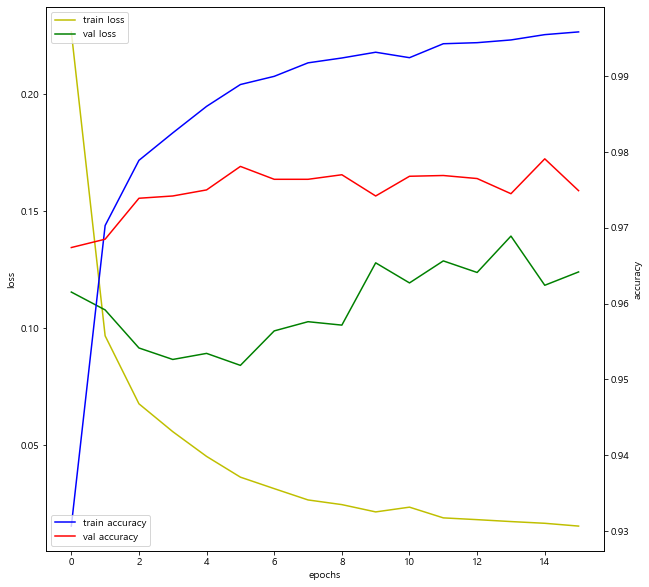

313/313 [==============================] - 0s 920us/step - loss: 0.1201 - accuracy: 0.9769


loss: 0.12007929384708405 ,metrics["accuracy"]: 0.9768999814987183


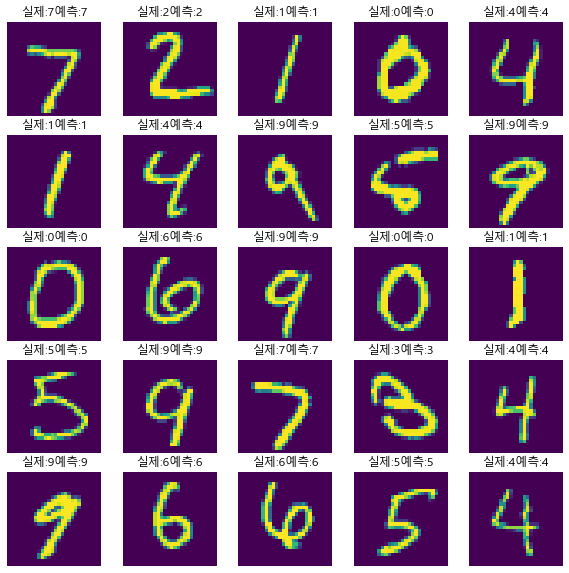

In [4]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width*height).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//5, i%5]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)

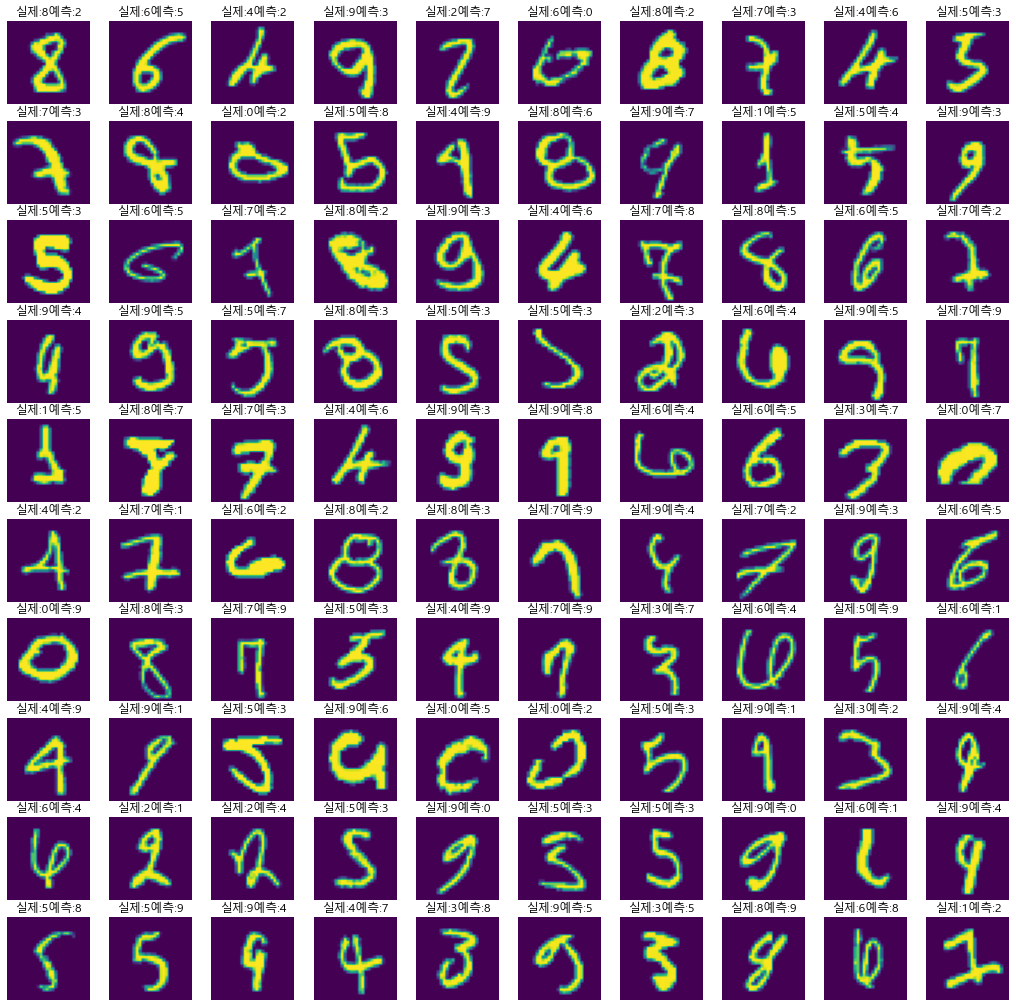

In [5]:
# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while cnt < (plt_row*plt_col):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

# 2. CNN(컨볼루션 레이어 -> 깊은 컨볼루션 레이어)

Epoch 1/30
1563/1563 [==============================] - 21s 13ms/step - loss: 0.3353 - accuracy: 0.8935 - val_loss: 0.0665 - val_accuracy: 0.9792
Epoch 2/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0442 - val_accuracy: 0.9873
Epoch 3/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0334 - accuracy: 0.9893 - val_loss: 0.0444 - val_accuracy: 0.9882
Epoch 4/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0214 - accuracy: 0.9936 - val_loss: 0.0412 - val_accuracy: 0.9880
Epoch 5/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0159 - accuracy: 0.9942 - val_loss: 0.0346 - val_accuracy: 0.9898
Epoch 6/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.0506 - val_accuracy: 0.9868
Epoch 7/30
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0367 -

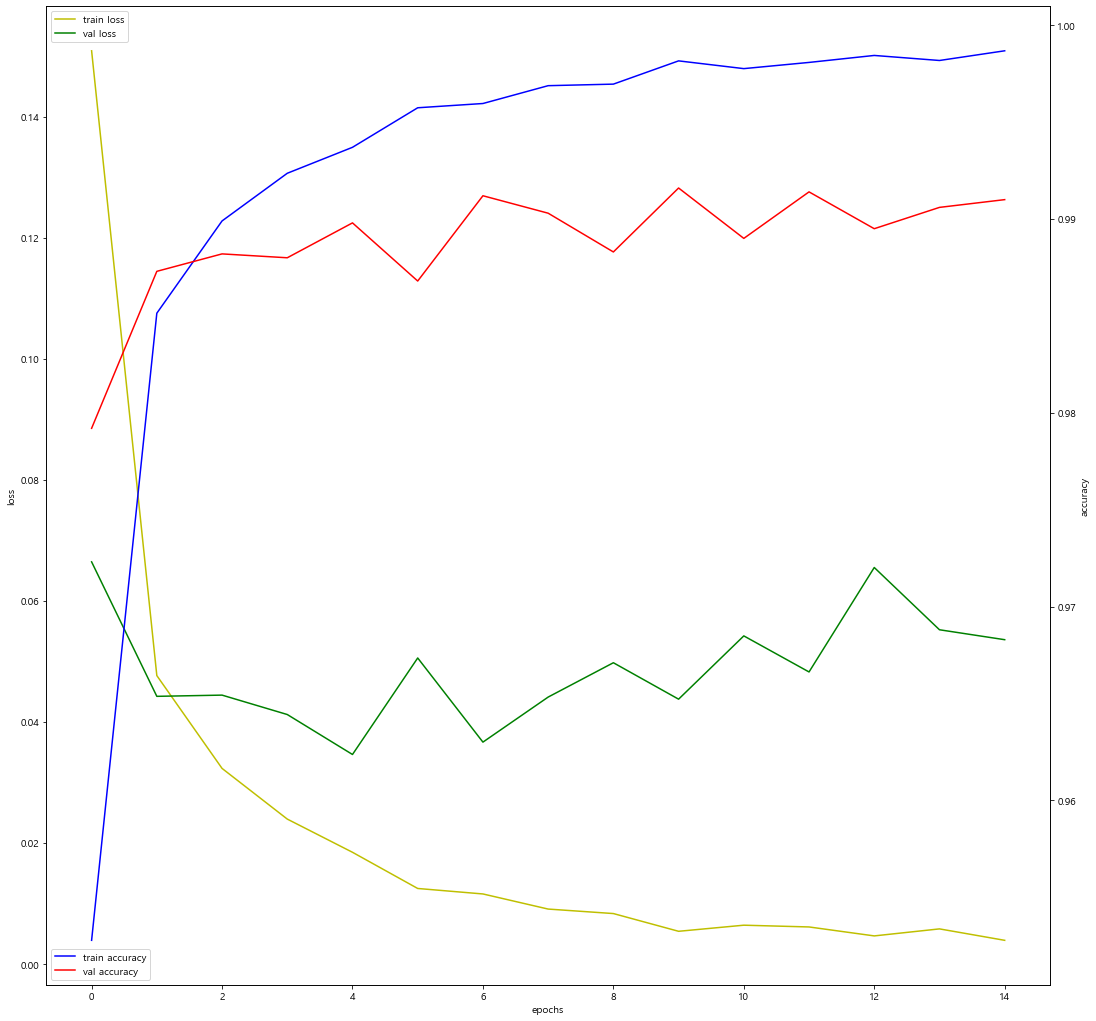

313/313 [==============================] - 1s 3ms/step - loss: 0.0453 - accuracy: 0.9910


loss: 0.0453031025826931 ,metrics["accuracy"]: 0.9909999966621399


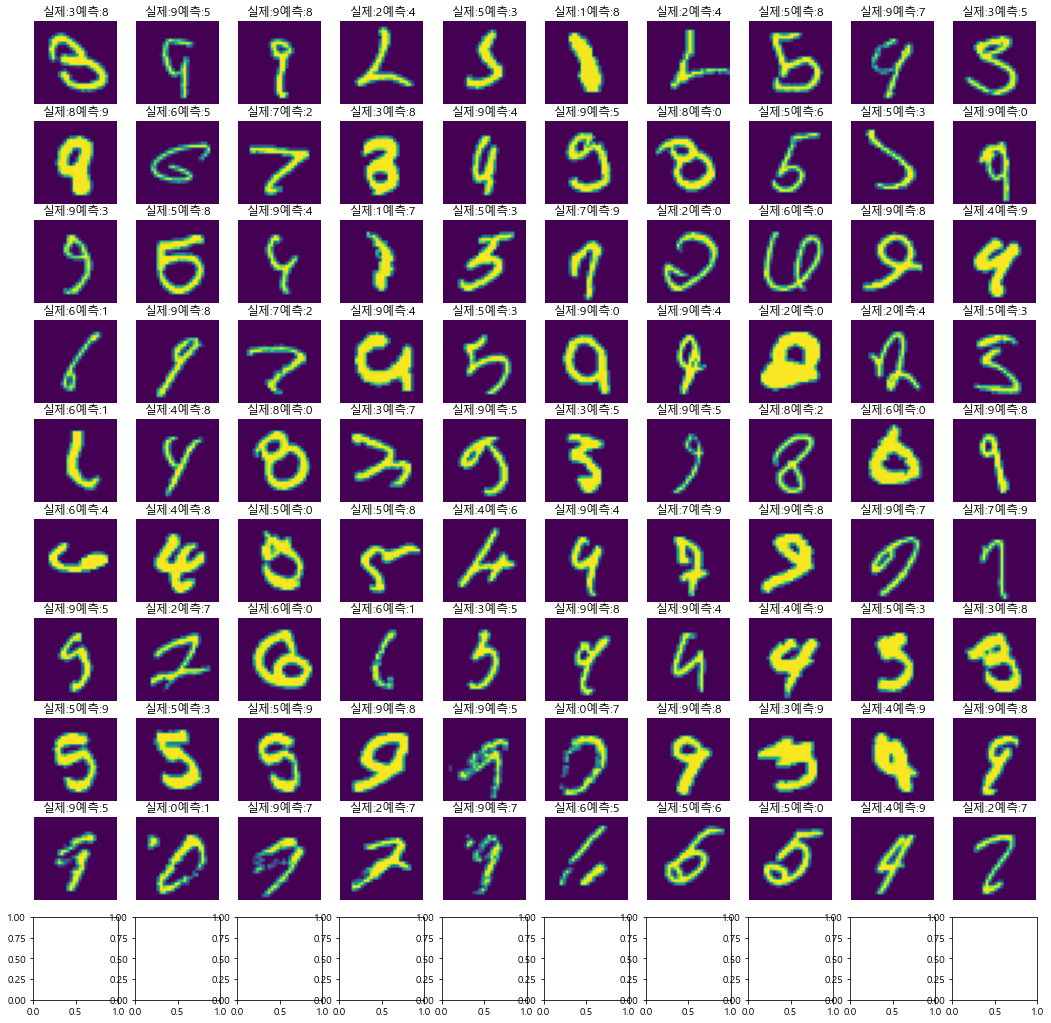

In [6]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while ( cnt < (plt_row*plt_col) ) and ( i<len(yhat) ):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

In [7]:
# 1. 데이터 셋 생성
width = 28; height=28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test  = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val   = utils.to_categorical(y_val)
y_test  = utils.to_categorical(y_test)

# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(width, height, 1)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, input_dim=width*height, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, 
                 validation_data=(x_val, y_val),
                 callbacks=[early_stopping])

# 5. 학습과정 살펴보기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

# 6. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print("\n\nloss:", score[0], ',metrics["accuracy"]:', score[1])

# 7. 모델 사용하기(예측)
yhat = model.predict(x_test, batch_size=32)
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (18,18)
plt.rc("font", family="Malgun Gothic")
f, axarr = plt.subplots(plt_row, plt_col)
i = 0
cnt = 0
while ( cnt < (plt_row*plt_col) ) and ( i<len(yhat) ):
    if np.argmax(y_test[i]) == np.argmax(yhat[i]):
        i+=1
        continue
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.axis("off")
    title = "실제:"+str(np.argmax(y_test[i])) + "예측:"+str(np.argmax(yhat[i]))
    sub_plt.set_title(title)
    i += 1
    cnt += 1

Epoch 1/30
1563/1563 [==============================] - 72s 46ms/step - loss: 0.3400 - accuracy: 0.8886 - val_loss: 0.0523 - val_accuracy: 0.9851
Epoch 2/30
1563/1563 [==============================] - 75s 48ms/step - loss: 0.0529 - accuracy: 0.9830 - val_loss: 0.0329 - val_accuracy: 0.9907
Epoch 3/30
1563/1563 [==============================] - 70s 45ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0444 - val_accuracy: 0.9895
Epoch 4/30
1563/1563 [==============================] - 72s 46ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 5/30
1563/1563 [==============================] - 69s 44ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.0315 - val_accuracy: 0.9921
Epoch 6/30
1563/1563 [==============================] - 70s 45ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.0306 - val_accuracy: 0.9915
Epoch 7/30
1563/1563 [==============================] - 68s 43ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0294 -

KeyboardInterrupt: 